# Using Simple Regression and Correlation to help conduct EDA

In [142]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import plotly.graph_objects as go
import numpy as np

In [2]:
cg_df = pd.read_parquet('cg_est', engine='pyarrow')
bh_df: pd.DataFrame = pd.read_parquet('bus_holdings', engine='pyarrow')
bus_cats_df = pd.read_parquet('bus_cats', engine='pyarrow')

One question we may want to ask is if businesses with a higher variety (i.e. more categories) tend to have higher review counts?

In [3]:
bus_cats_counts_df = bus_cats_df.groupby(['BusinessName'], as_index=False)['BusinessCategoryName'].count()
bus_cats_counts_df = bus_cats_counts_df.rename({'BusinessCategoryName': 'cat_counts'}, axis=1)
bus_cats_counts_df

,BusinessName,cat_counts
0,1-chinese-restaurant-coinjock,1
1,1-cow-ten-sleep,1
2,1-more-bar-and-grille-bright,2
3,1-north-steakhouse-hampton-bays-2,1
4,10-40-coffee-west-plains,1
...,...,...
63306,zzs-sports-bar-and-grill-adrian,2
63307,zzzz-s-pizzzza-burlington,1
63308,àlavita-boise-2,1
63309,ándale-caguas-2,2


In [4]:
most_recent_bus_df = bh_df.sort_values(by='CloseDate', ascending=True).groupby(['BusinessName'], as_index=False).last()
most_recent_bus_df

,BusinessName,ChainName,BusinessRating,ReviewCount,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta,CloseDate
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2.0,3.000000000,0.0,0E-9,0.0,0E-9,2022-02-09
1,1-cow-ten-sleep,1 Cow,4.500000000,6,6.0,4.500000000,0.0,0E-9,0.0,0E-9,2022-02-07
2,1-more-bar-and-grille-bright,1 More Bar & Grille,4.000000000,9,9.0,4.000000000,0.0,0E-9,0.0,0E-9,2022-02-09
3,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.000000000,149,149.0,4.000000000,0.0,0E-9,2.0,0E-9,2022-02-09
4,10-40-coffee-west-plains,10/40 Coffee,5.000000000,11,11.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-09
...,...,...,...,...,...,...,...,...,...,...,...
63312,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.500000000,10,10.0,3.500000000,0.0,0E-9,0.0,0E-9,2022-02-09
63313,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.000000000,1,1.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-09
63314,àlavita-boise-2,ÀLAVITA,4.000000000,307,307.0,4.000000000,0.0,0E-9,3.0,0E-9,2022-02-09
63315,ándale-caguas-2,Ándale,5.000000000,3,3.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-07


In [5]:
most_recent_bus_cats_df = pd.merge(left=most_recent_bus_df, right=bus_cats_counts_df, on='BusinessName', how='inner')
most_recent_bus_cats_df

,BusinessName,ChainName,BusinessRating,ReviewCount,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta,CloseDate,cat_counts
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.000000000,2,2.0,3.000000000,0.0,0E-9,0.0,0E-9,2022-02-09,1
1,1-cow-ten-sleep,1 Cow,4.500000000,6,6.0,4.500000000,0.0,0E-9,0.0,0E-9,2022-02-07,1
2,1-more-bar-and-grille-bright,1 More Bar & Grille,4.000000000,9,9.0,4.000000000,0.0,0E-9,0.0,0E-9,2022-02-09,2
3,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.000000000,149,149.0,4.000000000,0.0,0E-9,2.0,0E-9,2022-02-09,1
4,10-40-coffee-west-plains,10/40 Coffee,5.000000000,11,11.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-09,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63306,zzs-sports-bar-and-grill-adrian,ZZ's Sports Bar & Grill,3.500000000,10,10.0,3.500000000,0.0,0E-9,0.0,0E-9,2022-02-09,2
63307,zzzz-s-pizzzza-burlington,ZZZZ’s PIzzzza,5.000000000,1,1.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-09,1
63308,àlavita-boise-2,ÀLAVITA,4.000000000,307,307.0,4.000000000,0.0,0E-9,3.0,0E-9,2022-02-09,1
63309,ándale-caguas-2,Ándale,5.000000000,3,3.0,5.000000000,0.0,0E-9,0.0,0E-9,2022-02-07,2


In [6]:
for col in most_recent_bus_cats_df.filter(regex= '[Rr]ating', axis=1).columns:
    most_recent_bus_cats_df[col] = most_recent_bus_cats_df[col].astype(float)
most_recent_bus_cats_df.dtypes

BusinessName                object
ChainName                   object
BusinessRating             float64
ReviewCount                  int64
previous_review_cnt        float64
previous_rating            float64
abs_review_diff            float64
abs_rating_diff            float64
total_review_cnt_delta     float64
total_bus_rating_delta     float64
CloseDate                 category
cat_counts                   int64
dtype: object

In [7]:
cat_counts_corr = most_recent_bus_cats_df.corr()['cat_counts']
cat_counts_corr.sort_values()

BusinessRating           -0.050409
previous_rating          -0.049321
total_bus_rating_delta   -0.005122
abs_rating_diff          -0.001098
abs_review_diff           0.043315
ReviewCount               0.104611
previous_review_cnt       0.104869
total_review_cnt_delta    0.120964
cat_counts                1.000000
Name: cat_counts, dtype: float64

The greatest correlation that `cat_counts` has seems to be with columns related to the review count. These correlations can be visualized so we can see such correlation a bit easier

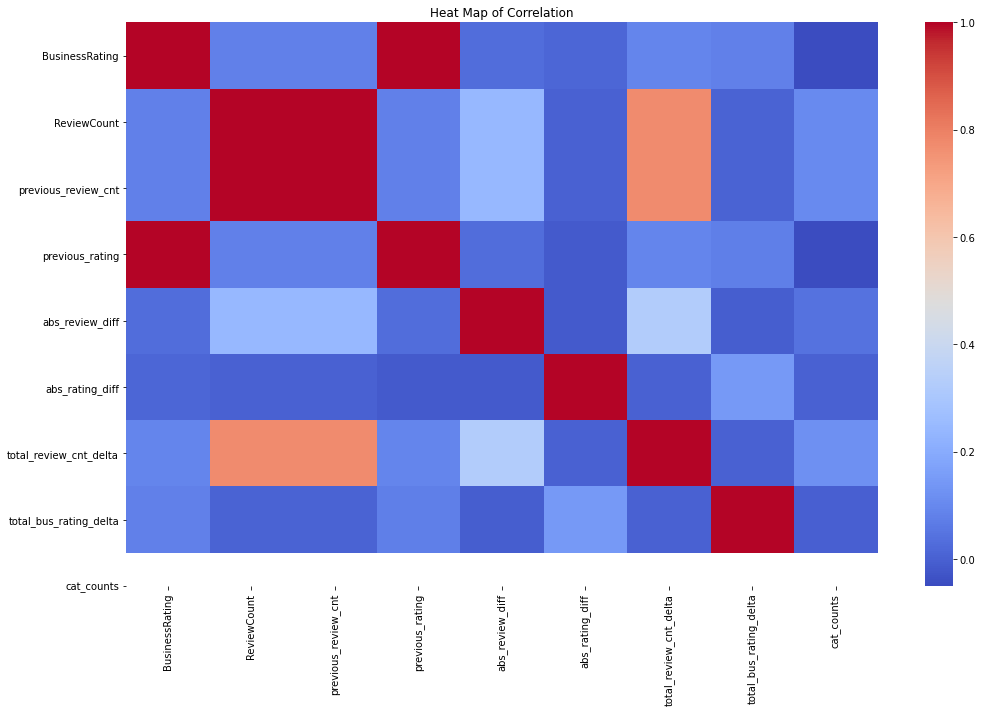

In [8]:
plt.figure(figsize=(15, 10))
sns.heatmap(most_recent_bus_cats_df.corr()[:-1], xticklabels=most_recent_bus_cats_df.corr()[:-1].columns, yticklabels=most_recent_bus_cats_df.corr()[:-1].columns, cmap='coolwarm')
plt.title('Heat Map of Correlation')
plt.tight_layout()
plt.show()

Another method is to do some form of regression whether linear, non-parametric, etc.\
Before doing these however, it may be best to glance at the histograms of these variables to see if some further transformation needs to be done.

array([[<AxesSubplot:title={'center':'cat_counts'}>,
        <AxesSubplot:title={'center':'total_review_cnt_delta'}>],
       [<AxesSubplot:title={'center':'previous_review_cnt'}>,
        <AxesSubplot:title={'center':'ReviewCount'}>]], dtype=object)

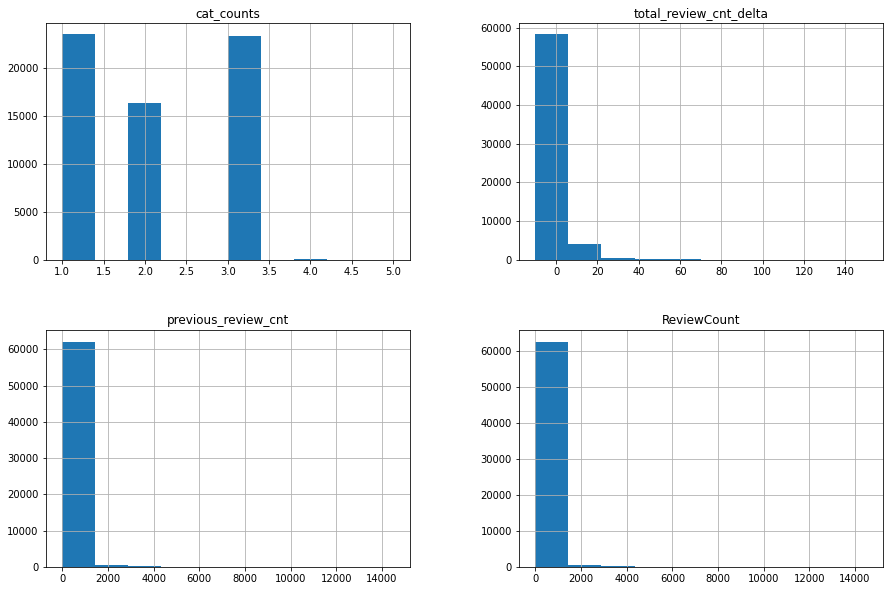

In [9]:
most_recent_bus_cats_df.hist(column=[
    'cat_counts', 'total_review_cnt_delta', 'previous_review_cnt', 'ReviewCount'], figsize=(15, 10), bins=10)

We'll come back to this question a bit later for now it seems best to just keep the variables as is however we will have to keep in mind that there seem to be some extreme values.


<AxesSubplot:xlabel='cat_counts', ylabel='total_review_cnt_delta'>

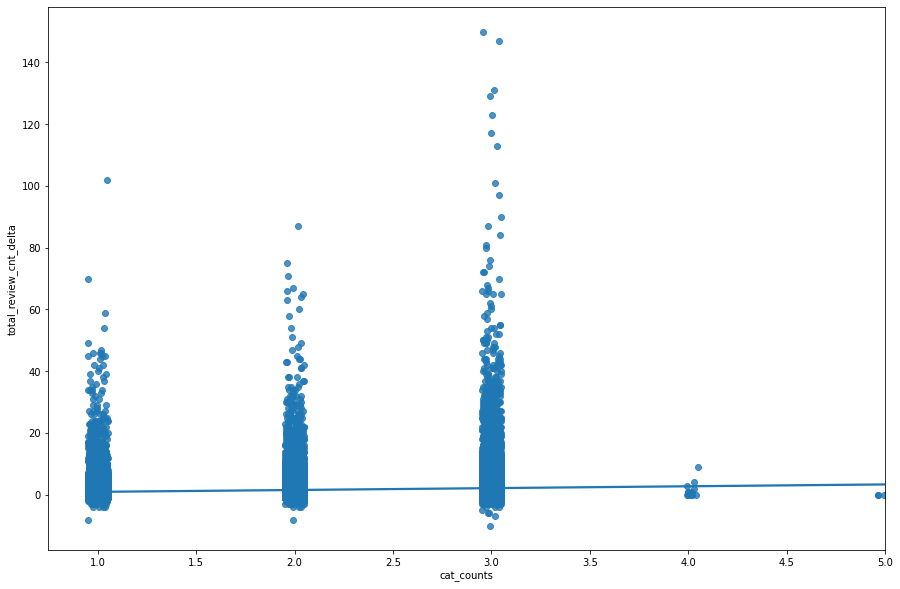

In [10]:
plt.figure(figsize=(15, 10))
sns.regplot(x=most_recent_bus_cats_df['cat_counts'], y=most_recent_bus_cats_df['total_review_cnt_delta'], x_jitter=.05)


Interesting to note is that the the businesses with 3 counts do tend to have a higher absolute review change over the observed period than businesses with less counts (i.e. less variety). However the pattern isn't linear at all now this may be due to the fact that category counts of 4 and 5 could be considered extreme values moreover, since these form part of our explanatory variables (i.e. right-side) an option could be to remove them from our dataset. Before making such a decision we should review these observations first.

We can make a quick function to assist with that

In [11]:
def bus_cat_groups(x):
    group_dict = {}
    cats = []
    for row in x:
        cats.append(row)
    group_dict['cats'] = cats
    group_dict['goe_4'] = (1 if len(cats) >= 4 else 0)
    return pd.Series(group_dict)

In [42]:
bus_cats_groups_df = bus_cats_df.groupby(by=['BusinessName', 'CityName', 'CountyName', 'CountryName', 'StateName', 'Latitude','Longitude'], as_index=False, observed=True)['BusinessCategoryName'].apply(bus_cat_groups)
bus_cats_groups_df_cut = bus_cats_groups_df[bus_cats_groups_df['goe_4'] == 1]
pd.set_option('display.max_colwidth', 100) # 50 seems to be default
bus_cats_groups_df_cut.head()

,BusinessName,CityName,CountyName,CountryName,StateName,Latitude,Longitude,cats,goe_4
1235,alicias-sugar-shack-twain-harte-4,Twain Harte,Tuolumne County,US,California,38.060581000,-120.199654000,"[Bakeries, Breakfast & Brunch, Cafes, Coffee & Tea]",1
5634,boathouse-restaurant-winona-lake,Winona Lake,Kosciusko County,US,Indiana,41.228895000,-85.822507000,"[American (Traditional), Beer, Wine & Spirits, Seafood, Steakhouses]",1
6932,bruneau-dunes-state-park-mountain-home-2,Mountain Home,Owyhee County,US,Idaho,42.911346000,-115.715073000,"[Landmarks & Historical Buildings, Botanical Gardens, Parks, Campgrounds]",1
12733,country-cafe-hot-springs,Hot Springs,Bath County,VI,Virginia,37.978512000,-79.842720000,"[American (Traditional), Breakfast & Brunch, Cafes, Comfort Food, Desserts]",1
20165,frans-world-of-beauty-praise-shop-algona,Algona,Kossuth County,US,Iowa,43.064159000,-94.227310000,"[Accessories, Women's Clothing, Bookstores, Coffee & Tea]",1


I believe I'm a bit familiar with a couple of these kinds of stores. A lot of these tend to be located in the country and because of that serve various functions. We can inspect their locations and estimated populations.

In [43]:
bus_cats_groups_df_cut_cg = pd.merge(left=bus_cats_groups_df_cut, right=cg_df, on=['StateName','CountyName'], how='left')
bus_cats_groups_df_cut_cg.head()

,BusinessName,CityName,CountyName,CountryName,StateName,Latitude,Longitude,cats,goe_4,EstimationYear,EstimatedPopulation,lastpop,relative_delta,abs_delta
0,alicias-sugar-shack-twain-harte-4,Twain Harte,Tuolumne County,US,California,38.060581000,-120.199654000,"[Bakeries, Breakfast & Brunch, Cafes, Coffee & Tea]",1,2019,54478,54387,0.001673,91
1,boathouse-restaurant-winona-lake,Winona Lake,Kosciusko County,US,Indiana,41.228895000,-85.822507000,"[American (Traditional), Beer, Wine & Spirits, Seafood, Steakhouses]",1,2019,79456,79416,0.000504,40
2,bruneau-dunes-state-park-mountain-home-2,Mountain Home,Owyhee County,US,Idaho,42.911346000,-115.715073000,"[Landmarks & Historical Buildings, Botanical Gardens, Parks, Campgrounds]",1,2019,11823,11669,0.013197,154
3,country-cafe-hot-springs,Hot Springs,Bath County,VI,Virginia,37.978512000,-79.842720000,"[American (Traditional), Breakfast & Brunch, Cafes, Comfort Food, Desserts]",1,2019,4147,4253,-0.024924,-106
4,frans-world-of-beauty-praise-shop-algona,Algona,Kossuth County,US,Iowa,43.064159000,-94.227310000,"[Accessories, Women's Clothing, Bookstores, Coffee & Tea]",1,2019,14813,14878,-0.004369,-65


Going to get the counties not apart of those above

In [45]:
cg_df_not_in = cg_df[~(cg_df['StateName'].astype(str) + cg_df['CountyName']).isin((bus_cats_groups_df_cut_cg['StateName'].astype(str) + bus_cats_groups_df_cut_cg['CountyName']).tolist())]
cg_df_not_in.shape

(3205, 7)

In [82]:
cg_df_not_in.abs_delta.mean()

482.9762870514821

In [85]:
bus_cats_groups_df_cut_cg.groupby(by=['StateName','CountyName'], as_index=False, observed=True)['abs_delta'].first()['abs_delta'].mean()

294.8666666666667

Comparing the means there is a bit of a difference between the two groups. Alternatively we could check by physical location 

In [87]:

fig = go.Figure(
    data=go.Scattergeo(
        lon=bus_cats_groups_df_cut_cg['Longitude'],
        lat=bus_cats_groups_df_cut_cg['Latitude'],
        mode='markers',
        text = bus_cats_groups_df_cut_cg['abs_delta'].astype(str) , 
        marker = dict(
            colorscale = 'Blues', 
            color=bus_cats_groups_df_cut_cg['abs_delta'],
            colorbar = dict(
            titleside = "top",
            outlinecolor = "rgba(68, 68, 68, 0)",
            title = "Estimated Abosute Population <br> change from previous year"

        ))
    )
)
fig.update_layout(
    geo_scope='usa',
    title= 'Businesses specializing in 4+ business category areas'
)
fig.show()

In [ ]:
# bus_cats_groups_df_cut_lt4 = bus_cats_groups_df[bus_cats_groups_df['goe_4'] == 0]
# bus_cats_groups_df_cut_lt4.head()

In [ ]:
# bus_cats_groups_df_cut_lt4_cg = pd.merge(left=bus_cats_groups_df_cut_lt4, right=cg_df, on=['StateName','CountyName'], how='left')
# bus_cats_groups_df_cut_lt4_cg.head()

In [ ]:
# bus_cats_groups_df_cut_lt4_cg.shape

In [ ]:
#perhaps do the same with the other set of data
# too slow when having rendered it

# fig = go.Figure(
#     data=go.Scattergeo(
#         lon=bus_cats_groups_df_cut_lt4_cg['Longitude'],
#         lat=bus_cats_groups_df_cut_lt4_cg['Latitude'],
#         mode='markers',
#         text = bus_cats_groups_df_cut_lt4_cg['abs_delta'].astype(str) , 
#         marker = dict(colorscale = 'Blues', color=bus_cats_groups_df_cut_lt4_cg['abs_delta'],colorbar = dict(
#             titleside = "top",
#             outlinecolor = "rgba(68, 68, 68, 0)",
#             title = "Estimated Abosute Population <br> change from previous year"

#         ))
#     )
# )
# fig.update_layout(
#     geo_scope='usa',
#     title= 'Businesses specializing in >4 business category areas'
# )
# fig.show()

While these counties are not experiencing much growth so to speak this isn't something definitive on the basis of which we could discard them. This would be a question of looking at our original question and weighing the tradeoffs. \
Businesses with more than 3 categories don't provide much value at this point so we'll remove them.

In [93]:
most_recent_bus_cats_df.head()

,BusinessName,ChainName,BusinessRating,ReviewCount,previous_review_cnt,previous_rating,abs_review_diff,abs_rating_diff,total_review_cnt_delta,total_bus_rating_delta,CloseDate,cat_counts
0,1-chinese-restaurant-coinjock,1 Chinese Restaurant,3.0,2,2.0,3.0,0.0,0.0,0.0,0.0,2022-02-09,1
1,1-cow-ten-sleep,1 Cow,4.5,6,6.0,4.5,0.0,0.0,0.0,0.0,2022-02-07,1
2,1-more-bar-and-grille-bright,1 More Bar & Grille,4.0,9,9.0,4.0,0.0,0.0,0.0,0.0,2022-02-09,2
3,1-north-steakhouse-hampton-bays-2,1 North Steakhouse,4.0,149,149.0,4.0,0.0,0.0,2.0,0.0,2022-02-09,1
4,10-40-coffee-west-plains,10/40 Coffee,5.0,11,11.0,5.0,0.0,0.0,0.0,0.0,2022-02-09,1


In [94]:
most_recent_bus_cats_df_lt_4 = most_recent_bus_cats_df[most_recent_bus_cats_df['cat_counts'] < 4]
most_recent_bus_cats_df_lt_4.shape

(63296, 12)

Now we'll continue where we left off with the regression and this time get an equation for it to be able to predict the total review count changes over the observed period. In this analysis we won't be splitting the dataframe into a work set and holdout set due to the nature of our analysis.

In [99]:
most_recent_bus_cats_df_not_na = most_recent_bus_cats_df[most_recent_bus_cats_df['total_review_cnt_delta'].notna()]
most_recent_bus_cats_df_not_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62746 entries, 0 to 63310
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   BusinessName            62746 non-null  object  
 1   ChainName               62746 non-null  object  
 2   BusinessRating          62746 non-null  float64 
 3   ReviewCount             62746 non-null  int64   
 4   previous_review_cnt     62746 non-null  float64 
 5   previous_rating         62746 non-null  float64 
 6   abs_review_diff         62746 non-null  float64 
 7   abs_rating_diff         62746 non-null  float64 
 8   total_review_cnt_delta  62746 non-null  float64 
 9   total_bus_rating_delta  62746 non-null  float64 
 10  CloseDate               62746 non-null  category
 11  cat_counts              62746 non-null  int64   
dtypes: category(1), float64(7), int64(2), object(2)
memory usage: 5.8+ MB


In [129]:
X = sm.add_constant(most_recent_bus_cats_df_not_na['cat_counts'])
y = most_recent_bus_cats_df_not_na['total_review_cnt_delta']
univariate_lin_model = sm.OLS(Y, X)
results = univariate_lin_model.fit(cov_type='HC1')

/mnt/c/Users/Ron/git-repos/data-analysis-business-economics-policy/da_venv/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [130]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     total_review_cnt_delta   R-squared:                       0.015
Model:                                OLS   Adj. R-squared:                  0.015
Method:                     Least Squares   F-statistic:                     882.0
Date:                    Tue, 22 Feb 2022   Prob (F-statistic):          1.74e-192
Time:                            15:56:48   Log-Likelihood:            -1.7976e+05
No. Observations:                   62746   AIC:                         3.595e+05
Df Residuals:                       62744   BIC:                         3.595e+05
Df Model:                               1                                         
Covariance Type:                      HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3555      0.035     10.232      0.000       0.287       0.424
cat_counts     0.6005      0.020     29.699      0.000       0.561       0.640
==============================================================================
Omnibus:                    96141.851   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         79135338.931
Skew:                           9.494   Prob(JB):                         0.00
Kurtosis:                     175.940   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [131]:
#make sure to add constant when predicting as well
univariate_lin_model_predictions = results.predict(X)
univariate_lin_model_predictions

0        0.955956
1        0.955956
2        1.556409
3        0.955956
4        0.955956
           ...   
63306    1.556409
63307    0.955956
63308    0.955956
63309    1.556409
63310    0.955956
Length: 62746, dtype: float64

In [134]:
univariate_lin_model_predictions_variance = ((univariate_lin_model_predictions - univariate_lin_model_predictions.mean()) ** 2).sum() / univariate_lin_model_predictions.shape[0]
y_variance = ((y - y.mean()) ** 2).sum() / y.shape[0]

In [137]:
univariate_lin_model_rsquared = univariate_lin_model_predictions_variance / y_variance
univariate_lin_model_rsquared

0.014632235702369167

In [138]:
residuals = y - univariate_lin_model_predictions
residuals

0       -0.955956
1       -0.955956
2       -1.556409
3        1.044044
4       -0.955956
           ...   
63306   -1.556409
63307   -0.955956
63308    2.044044
63309   -1.556409
63310   -0.955956
Length: 62746, dtype: float64

In [140]:
residuals_var = ((residuals - residuals.mean()) ** 2).sum() / residuals.shape[0]
univariate_lin_model_rsquared_2 = 1 - (residuals_var / y_variance)
univariate_lin_model_rsquared_2

0.014632235702369267